In [1]:
import glob
import json
import datetime

import numpy
import pandas

In [2]:
directory = "github-cmssw"
title = "Non-fork repositories of GitHub users who forked CMSSW"

# directory = "github-alice"
# title = "Non-fork repositories of GitHub users who forked AliPhysics"

In [3]:
repos = []
for filename in glob.glob(directory + "/*.json"):
    file = open(filename).read()
    owner = json.loads(file[file.index("[\n"):])
    for repo in owner:
        if not repo["fork"]:
            repos.append({"name": repo["owner"]["login"] + "/" + repo["name"],
                          "date": datetime.datetime.fromisoformat(repo["created_at"].replace("Z", "")),
                          "lang": repo["language"]})

df = pandas.DataFrame(repos)
del repos

In [4]:
df2 = pandas.get_dummies(df, columns=["lang"], prefix="", prefix_sep="")
df2.columns

Index(['date', 'name', 'ASP', 'Arduino', 'Assembly', 'Asymptote', 'Batchfile',
       'C', 'C#', 'C++', 'CMake', 'CSS', 'CoffeeScript', 'Common Lisp', 'Cuda',
       'D', 'DIGITAL Command Language', 'Dockerfile', 'Elm', 'Emacs Lisp',
       'Erlang', 'F#', 'FLUX', 'FORTRAN', 'Fortran', 'GDScript', 'GLSL',
       'Gnuplot', 'Go', 'Groff', 'HCL', 'HTML', 'Haskell', 'Hy', 'IDL', 'Java',
       'JavaScript', 'Julia', 'Jupyter Notebook', 'KiCad', 'Kotlin', 'LLVM',
       'LabVIEW', 'LilyPond', 'Lua', 'M4', 'MATLAB', 'Makefile', 'Mathematica',
       'Matlab', 'Nim', 'Objective-C', 'Objective-J', 'OpenEdge ABL', 'PHP',
       'PLSQL', 'POV-Ray SDL', 'Pascal', 'Perl', 'PostScript', 'PowerShell',
       'Processing', 'Protocol Buffer', 'Puppet', 'Python', 'QML', 'QMake',
       'R', 'RobotFramework', 'Roff', 'Ruby', 'Rust', 'SQLPL', 'Scala',
       'Shell', 'SourcePawn', 'Standard ML', 'Swift', 'SystemVerilog', 'Tcl',
       'TeX', 'TypeScript', 'VHDL', 'Verilog', 'Vim script', 'VimL',
       

In [5]:
df2["year"] = df2["date"].dt.year
# df2 = df2[(2010 <= df2["year"]) & (df2["year"] < 2019)]
df2["C/C++"] = df2["C"] + df2["C++"]
df2["FORTRAN"] = df2["FORTRAN"] + df2["Fortran"]
del df2["Fortran"]

In [6]:
# df.groupby("lang").count().sort_values("name", ascending=False)

In [7]:
langs = ["C/C++", "Python", "Jupyter Notebook", "TeX", "Java", "R", "VHDL", "FORTRAN"] + (["Julia", "Go"] if directory == "github-cmssw" else ["Go"])
summary = df2[["year"] + langs].groupby("year").sum()
summary["total"] = sum(summary[x] for x in langs)

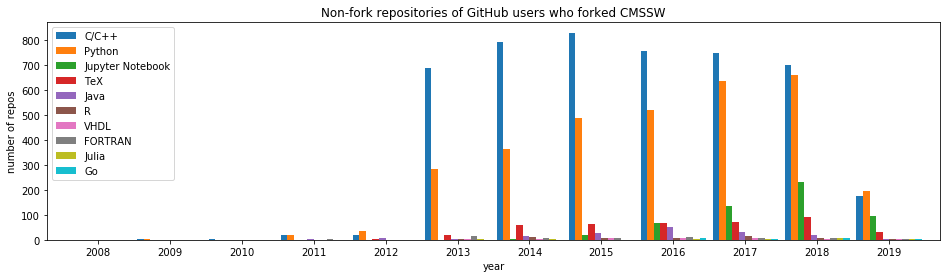

In [9]:
ax = summary[langs].plot.bar(width=(len(langs)/(len(langs) + 1)), logy=False, figsize=(16, 4), rot=0, legend=False)
ax.set_title(title)
ax.set_ylabel("number of repos")
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc="upper left")
ax.get_figure().savefig(directory + "-lin.png")
ax.get_figure().savefig(directory + "-lin.pdf")
ax

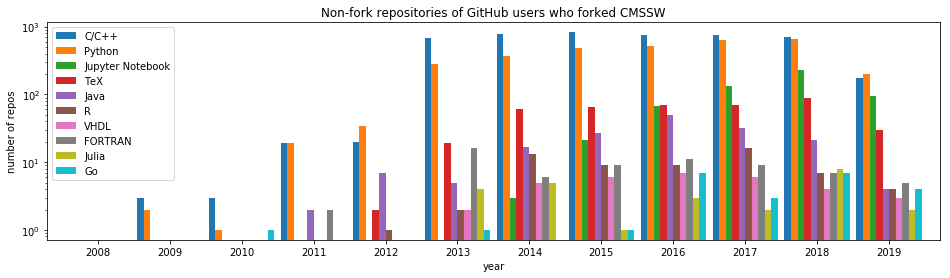

In [10]:
ax = summary[langs].plot.bar(width=(len(langs)/(len(langs) + 1)), logy=True, figsize=(16, 4), rot=0, legend=False)
ax.set_title(title)
ax.set_ylabel("number of repos")
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc="upper left")
ax.get_figure().savefig(directory + "-log.png")
ax.get_figure().savefig(directory + "-log.pdf")
ax

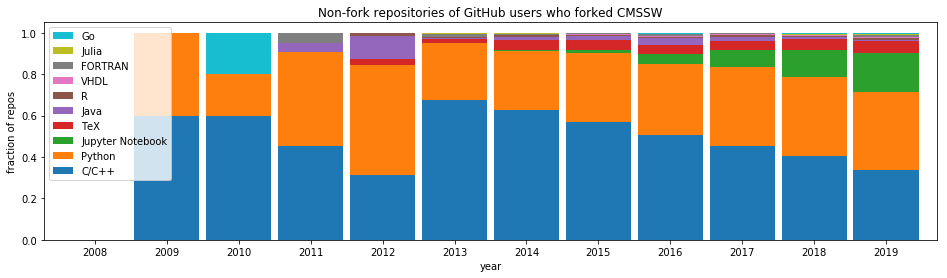

In [11]:
ratio = summary.copy()
for x in langs:
    ratio[x] = summary[x] / summary["total"]

ax = ratio[langs].plot.bar(width=(len(langs)/(len(langs) + 1)), stacked=True, figsize=(16, 4), rot=0, legend=False)
ax.set_title(title)
ax.set_ylabel("fraction of repos")
patches, labels = ax.get_legend_handles_labels()
ax.legend(reversed(patches), reversed(labels), loc="upper left")
ax.get_figure().savefig(directory + "-frac.png")
ax.get_figure().savefig(directory + "-frac.pdf")
ax